### Lab 4: Practice Linear Regression with Feature Selection

OK, your turn. This time, we'll use vehicle features to predict selling price for a used car.

**Target:** selling price of the used car<BR>
**Features:** Look at possible columns and decide which to use in your linear regression model


Follow the ML Process:<P>
1. Obtain and load the data
2. Perform Feature Selection
3. Split the data into training & test datasets
4. Format the data for the algorithm
5. Create the model and train it
6. Use the test set to measure the model's performance
7.  Use the model to make new predictions

In [1]:
# Load libraries
from sklearn import linear_model
from sklearn.metrics import r2_score # mean_squared_error,
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load the data

In [2]:
# Read data from a .csv (comma-separated-values) file in the local directory
# Adapted from: 
# https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv
df = pd.read_csv('../data/cars.csv')  # Notice the path to the data file
df.head(4)

,name,year,selling_price,km_driven,km/liter,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,5.0


#### Investigate the data

In [3]:
# Look at the data type of each column
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
km/liter         float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [4]:
# Use describe() to give summary statistics of the numeric data
#  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe()

,year,selling_price,km_driven,km/liter,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


#### Pull out the target column and load them into the 'y' variable

In [5]:
# Your code here

In [6]:
# Pull out selling_price as the target (the value we will predict)
y = df['selling_price']
y.head(5)

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

### 2. Perform Feature Selection: 

There are 6 possible columns to use as features. Perform feature selection using a correlational analysis to remove columns.

In [7]:
# Your code here

In [8]:
# First, let's drop the name and selling price from the df
#    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df = df.drop(['name','selling_price'], axis = 1)
df.head()

,year,km_driven,km/liter,engine,max_power,seats
0,2014,145500,23.40,1248.0,74.00,5.0
1,2014,120000,21.14,1498.0,103.52,5.0
2,2006,140000,17.70,1497.0,78.00,5.0
3,2010,127000,23.00,1396.0,90.00,5.0
4,2007,120000,16.10,1298.0,88.20,5.0


In [9]:
# Create a correlation plot
corr_df = df.corr()
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,year,km_driven,km/liter,engine,max_power,seats
year,1.00,-0.43,0.33,0.02,0.23,-0.01
km_driven,-0.43,1.00,-0.17,0.21,-0.04,0.23
km/liter,0.33,-0.17,1.00,-0.58,-0.37,-0.45
engine,0.02,0.21,-0.58,1.00,0.70,0.61
max_power,0.23,-0.04,-0.37,0.70,1.00,0.19
seats,-0.01,0.23,-0.45,0.61,0.19,1.00


#### Result of my 'feature selection':

In [10]:
# After my "qualitative" evaluation, I've decided to go with:
# Everything!
X = df
# I really considered dropping 'engine', but the model did slightly better with it.
#  X = df.drop(['engine'],axis = 1)
X.head(2)

,year,km_driven,km/liter,engine,max_power,seats
0,2014,145500,23.40,1248.0,74.00,5.0
1,2014,120000,21.14,1498.0,103.52,5.0


### 3. Split the data into training & test datasets

In [11]:
# Your code here

In [12]:
# Reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Verify the sizes of the split datasets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (6324, 6)
y_train: (6324,)
X_test: (1582, 6)
y_test: (1582,)


### 4. Format the data for the algorithm
Since the X data is already in a dataframe, we should be good. Just verify it.

In [13]:
# Your code here

In [14]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### 5. Create the model and train it

In [15]:
# Your code here:

In [16]:
# Create linear regression object
model = linear_model.LinearRegression()
#
# Train the model using the training sets
model.fit(X_train, y_train)
#
print('The linear model coefficents are:',model.coef_)
print('Intercept:',model.intercept_)

The linear model coefficents are: [ 4.32132605e+04 -1.25061258e+00  1.05014597e+04  1.12587046e+02
  1.57756949e+04 -7.45352888e+04]
Intercept: -87702684.43864024


### 6. Use the test set to measure the model's performance

In [17]:
# Make predictions of waist size using weights from the test dataset
y_pred = model.predict(X_test)
# Calc performance
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.63


### 7.  Use the model to make new predictions:
You need to create a few fictitious cars that we can predict. <BR>
Dataframes are excellent data structures to pass to the .predict() function

In [18]:
# Your code here

In [19]:
# Let's define some new cars and predict
cols = list(X.columns)
c1 = [2014.0, 77000.0, 12.55, 2982.0, 168.5, 4.0]
c2 = [2013.0, 99000.0, 12.99, 2494.0, 100.0, 7.0]
c3 = [2014.0, 27800.0, 14.8, 2143.0, 120.7, 5.0]
c4 = [2015.0, 49800.0, 24.7, 1498.0, 98.63, 2.0]
c5 = [2013.0, 151000.0, 13.5, 2477.0, 175.56, 7.0]
new_cars_df = pd.DataFrame(data = [c1,c2,c3,c4,c5], columns = cols)
#
# Call the predict function from the model
new_selling_price = model.predict(new_cars_df) # Returns list of arrays
# Need to flatten this list of arrays to just a list of scalers so we can plot it
new_selling_price = new_selling_price.flatten().tolist()
new_selling_price # Predicted values

[2060116.2650402337,
 634826.7276916504,
 1222200.653628245,
 1144682.5248035043,
 1765248.1415283233]

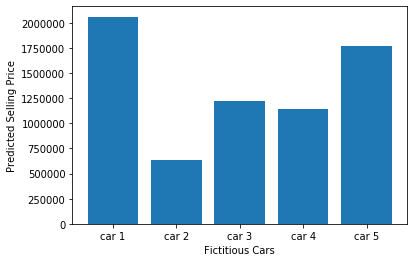

In [20]:
# Plot bar chart of the predicted values
x_bars = ['car 1','car 2','car 3','car 4','car 5']
plt.bar(x_bars, new_selling_price)
plt.xlabel("Fictitious Cars")
plt.ylabel("Predicted Selling Price")
plt.show()